# Analysis of minigolf game with my dear Lucía

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

During my summer holidays (23-27 JUL 2018) in [Hotel H10 Big Sur Hotel Boutique](https://www.h10hotels.com/es/hoteles-tenerife/h10-big-sur) I played a **minigolf game** with my dear Lucía and here you have a brief analysis of the results. Unfortunately i lost! :/

## Loading data

In [4]:
col_names = ['Player'] + [f'Hole {i}' for i in range(1, 17)]
df = pd.read_csv('minigolf.csv', header=None, index_col=0, names=col_names)
df

,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16
Player,,,,,,,,,,,,,,,,
Sergio,11,5,4,10,3,3,3,9,2,1,6,14,8,2,2,11
Lucía,13,2,4,5,4,6,3,5,3,5,12,12,3,3,3,2


## Lucía wins by 9 strokes!

In [5]:
df_cumsum = df.cumsum(axis=1)
df_cumsum

,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16
Player,,,,,,,,,,,,,,,,
Sergio,11,16,20,30,33,36,39,48,50,51,57,71,79,81,83,94
Lucía,13,15,19,24,28,34,37,42,45,50,62,74,77,80,83,85


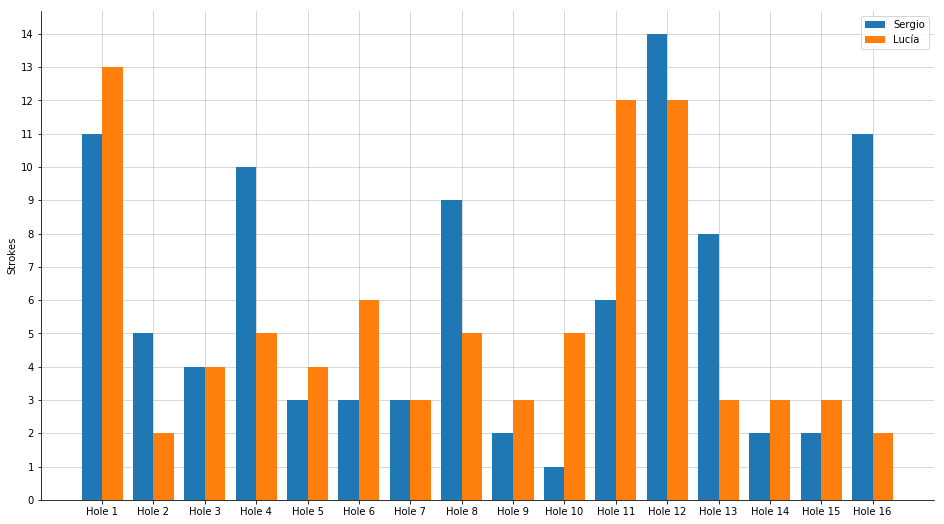

In [28]:
fig, ax = plt.subplots(figsize=(16, 9))

bar_width = .4
index = np.arange(df.shape[1])
xticks = index - ((df.index.size * bar_width) / 2)

for i, player in enumerate(df.index):
    ax.bar(
        xticks + (i * bar_width),
        df.loc[player],
        width=bar_width,
        label=player,
        align='edge',
        joinstyle='round'
    )

ax.set_xticks(index)
ax.set_xticklabels(df.columns.tolist())
ax.grid(color='gray', linestyle='-', linewidth=1, alpha=.3)
ax.set_axisbelow(True)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.legend()
ax.set_ylabel('Strokes')
ax.set_yticks(np.arange(15));

## Plotting cumulative strokes

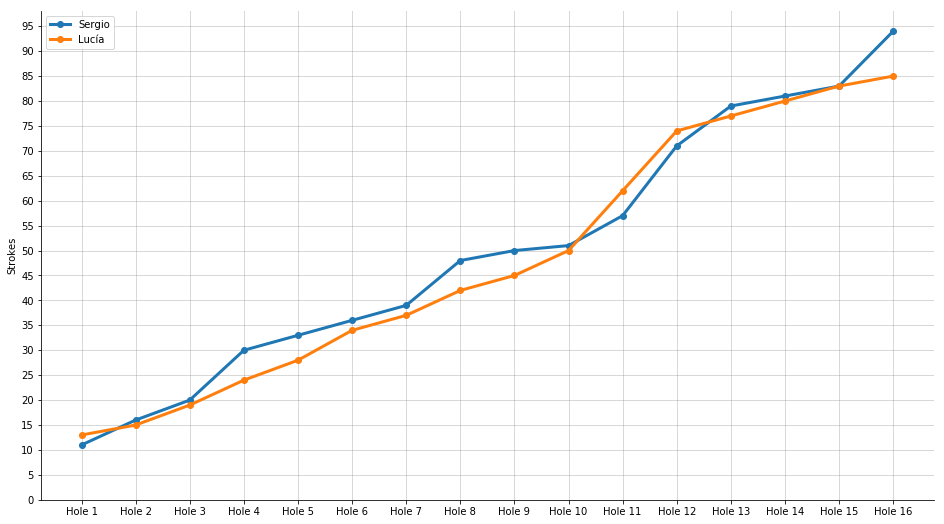

In [22]:
fig, ax = plt.subplots(figsize=(16, 9))
xticks = df_cumsum.columns.tolist()
ax.grid(color='gray', linestyle='-', linewidth=1, alpha=.3)
ax.set_axisbelow(True)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for player in df_cumsum.index.tolist():
    ax.plot(xticks, df_cumsum.loc[player], label=player, linewidth=3, marker='o')
ax.legend()
ax.set_ylabel('Strokes')
ax.set_yticks(np.arange(0, 100, 5));

## Calculating mean values

### The mean number of strokes per player:

In [93]:
df.mean(axis=1)

Player
Sergio    5.8750
Lucía     5.3125
dtype: float64

### The mean number of strokes per hole:

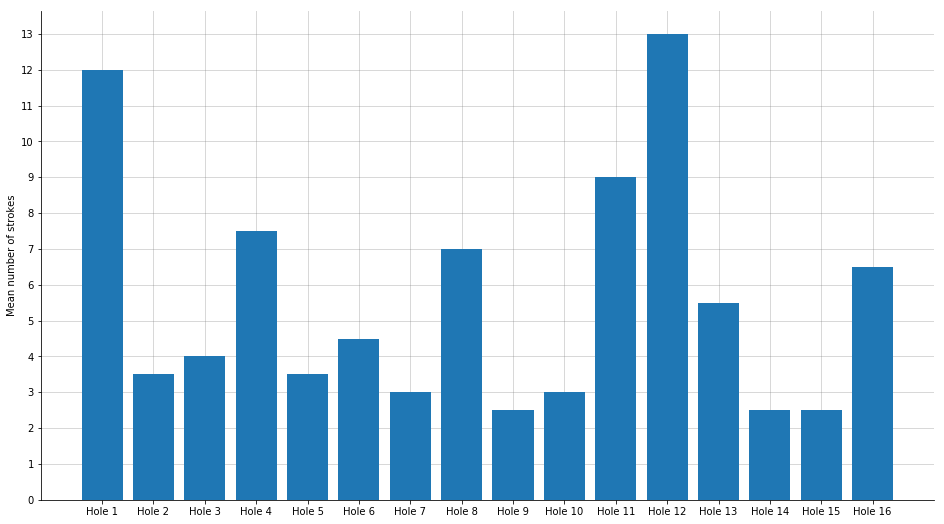

In [23]:
df_meanperholes = df.mean()
fig, ax = plt.subplots(figsize=(16, 9))
ax.grid(color='gray', linestyle='-', linewidth=1, alpha=.3)
ax.set_axisbelow(True)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.set_ylabel('Mean number of strokes')
ax.set_yticks(np.arange(0, 15));
ax.bar(df_meanperholes.index, df_meanperholes);

> **Hole 1** and **Hole 12** were tough! 😅